In [1]:
import os
os.chdir('/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm')
os.getcwd()

'/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
worldbank = pd.read_csv("worldbank_2017_2021.csv")
regions = pd.read_excel("countries_regions.xlsx")

In [7]:
# Dataset stucture 
worldbank.head()

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)"
0,Afghanistan,2017,5.99,58.12,26.42,11.80,2091.4,99.21,20.45,99.84,...,7.230000e+08,7.065000e+09,41.53,62.58,12.20,NaN,NaN,NaN,NaN,NaN
1,Albania,2017,14.56,42.86,19.02,22.34,4813.0,105.84,99.81,103.88,...,2.292000e+09,5.271000e+09,58.09,29.97,17.04,NaN,NaN,NaN,NaN,NaN
2,Algeria,2017,3.16,17.36,11.03,3.14,990.3,104.40,20.84,102.87,...,3.519100e+10,4.605900e+10,42.79,2.33,1.70,NaN,NaN,NaN,NaN,NaN
3,American Samoa,2017,NaN,13.90,NaN,4.65,NaN,NaN,41.67,NaN,...,3.970000e+08,5.950000e+08,162.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2017,NaN,40.04,0.56,1.74,NaN,NaN,NaN,NaN,...,1.180000e+08,1.478000e+09,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
regions.head()

,CountryName,Region,ThirdWorld
0,Afghanistan,South Asia,Yes
1,Albania,Eastern Europe,No
2,Algeria,Africa,No
3,American Samoa,Australia and Oceanea,No
4,Andorra,Western Europe,No


In [9]:
worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Columns: 195 entries, Country Name to Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)
dtypes: float64(193), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  217 non-null    object
 1   Region       217 non-null    object
 2   ThirdWorld   217 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [13]:
list(worldbank.columns)

['Country Name',
 'Year',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Arable land (% of land area)',
 'Cereal yield (kg per hectare)',
 'Crop production index (2014-2016 = 100)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Food production index (2014-2016 = 100)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Land area (sq. km)',
 'Livestock production index (2014-2016 = 100)',
 'Permanent cropland (% of land area)',
 'Rural population',
 'Rural population (% of total population)',
 'Surface area (sq. km)',
 'Access to electricity (% of population)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'Ease of doing business rank (1=most business-friendly regulations)',
 'Electric power consumption (kWh per capita)',
 'Energy us

In [14]:
# Select relevant column only 2017
wb_2017 = worldbank.loc[
    worldbank["Year"] == 2017,
    ["Country Name", "GNI per capita, PPP (current international $)"]
]

In [15]:
wb_2017 = wb_2017.rename(
    columns={
        "Country Name": "country",
        "GNI per capita, PPP (current international $)": "gni_ppp"
    }
)

In [16]:
# Check missing values
wb_2017.isna().sum()

country     0
gni_ppp    21
dtype: int64

In [17]:
# drop missing value
wb_2017_clean = wb_2017.dropna(subset=["gni_ppp"])

In [21]:
wb_2017_clean.columns

Index(['country', 'gni_ppp'], dtype='object')

In [23]:
regions.columns

Index(['CountryName', 'region', 'ThirdWorld'], dtype='object')

In [24]:
regions = regions.rename(
    columns={
        "CountryName": "country",
        "Region": "region"
    }
)

# Merge datasets
eda_df = wb_2017_clean.merge(
    regions,
    on="country",
    how="left"
)

In [25]:
eda_df.head()

,country,gni_ppp,region,ThirdWorld
0,Afghanistan,2360.0,South Asia,Yes
1,Albania,12800.0,Eastern Europe,No
2,Algeria,13520.0,Africa,No
3,Angola,6570.0,Africa,Yes
4,Antigua and Barbuda,20160.0,North America,No


In [26]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     195 non-null    object 
 1   gni_ppp     195 non-null    float64
 2   region      193 non-null    object 
 3   ThirdWorld  193 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.2+ KB


In [27]:
eda_df.describe()

,gni_ppp
count,195.000000
mean,21070.256410
std,20947.072168
min,790.000000
25%,5030.000000
50%,13520.000000
75%,29145.000000
max,109320.000000


In [28]:
eda_df.isna().sum()

country       0
gni_ppp       0
region        2
ThirdWorld    2
dtype: int64

In [29]:
eda_df[eda_df["region"].isna()]["country"].unique()

array(['United States', 'Viet Nam'], dtype=object)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

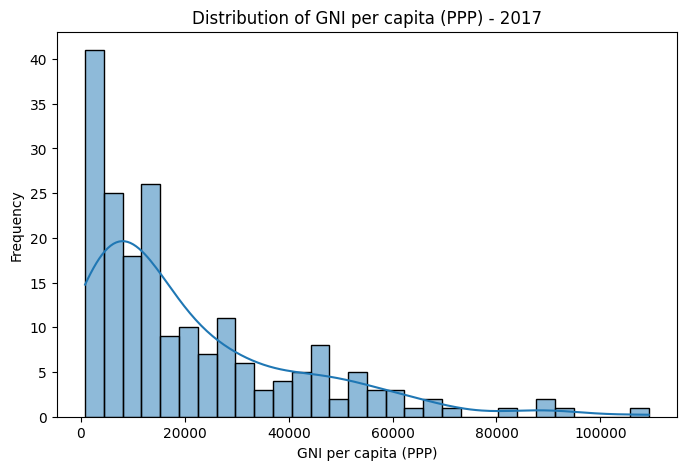

In [31]:
# Distribution of GNI per capita
plt.figure(figsize=(8, 5))
sns.histplot(eda_df["gni_ppp"], bins=30, kde=True)
plt.title("Distribution of GNI per capita (PPP) - 2017")
plt.xlabel("GNI per capita (PPP)")
plt.ylabel("Frequency")
plt.show()

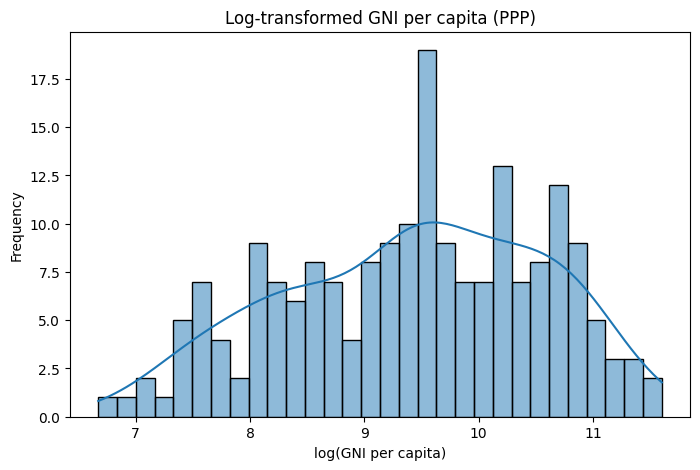

In [32]:
# Log transformation 
eda_df["log_gni_ppp"] = np.log(eda_df["gni_ppp"])
plt.figure(figsize=(8, 5))
sns.histplot(eda_df["log_gni_ppp"], bins=30, kde=True)
plt.title("Log-transformed GNI per capita (PPP)")
plt.xlabel("log(GNI per capita)")
plt.ylabel("Frequency")
plt.show()

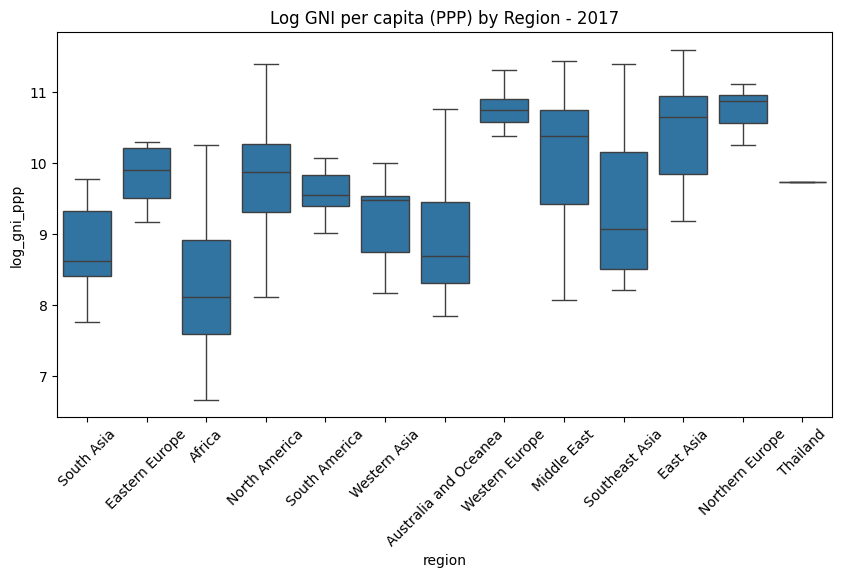

In [33]:
# GNI per capita by region
plt.figure(figsize=(10, 5))
sns.boxplot(data=eda_df, x="region", y="log_gni_ppp")
plt.xticks(rotation=45)
plt.title("Log GNI per capita (PPP) by Region - 2017")
plt.show()

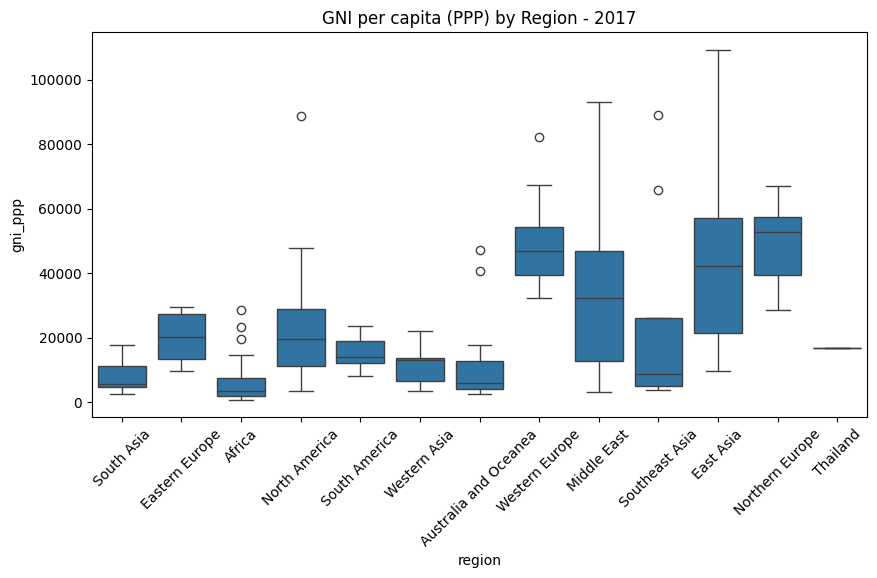

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=eda_df, x="region", y="gni_ppp")
plt.xticks(rotation=45)
plt.title("GNI per capita (PPP) by Region - 2017")
plt.show()

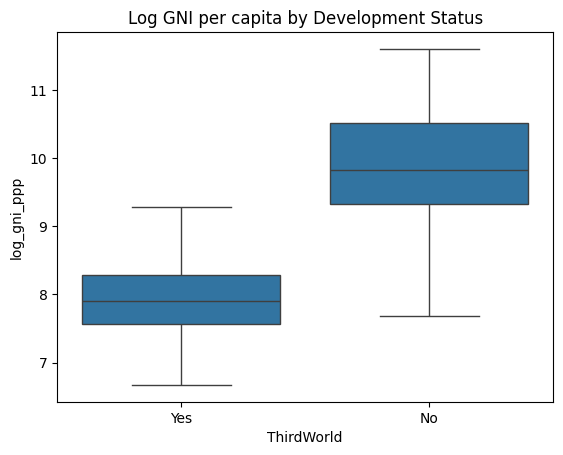

In [35]:
# ThirdWorld vs Non-ThirdWorld
sns.boxplot(data=eda_df, x="ThirdWorld", y="log_gni_ppp")
plt.title("Log GNI per capita by Development Status")
plt.show()

In [36]:
# Part 2.1 Clustering
# Data preparation -> Select feature
X = eda_df[["log_gni_ppp"]]
X.head()

,log_gni_ppp
0,7.766417
1,9.457200
2,9.511925
3,8.790269
4,9.911456


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
# Elbow method 
inertia = []

K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

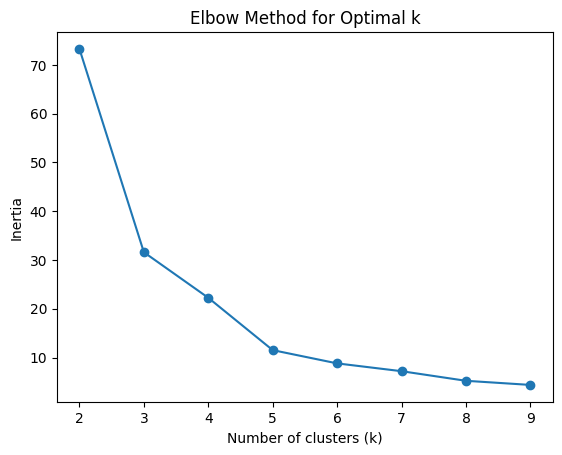

In [39]:
import matplotlib.pyplot as plt

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [40]:
# Silhouete score
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

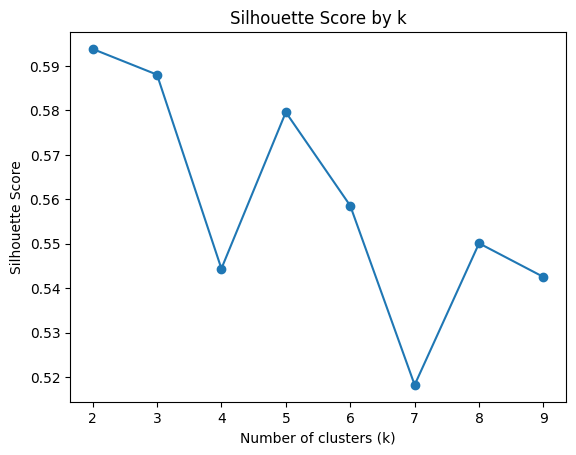

In [41]:
plt.plot(K_range, silhouette_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by k")
plt.show()

In [42]:
# Train final model
kmeans = KMeans(n_clusters=3, random_state=42)
eda_df["cluster"] = kmeans.fit_predict(X)

In [45]:
# Cluster summary 
eda_df.groupby("cluster")["gni_ppp"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,58.0,3337.068966,1474.213449,790.0,2055.0,3305.0,4677.5,6100.0
1,73.0,13482.602740,4440.125445,6480.0,10040.0,13240.0,15800.0,23150.0
2,64.0,45795.625000,18692.213460,23590.0,31032.5,42395.0,54370.0,109320.0


In [46]:
# Cluster summary (log)
eda_df.groupby("cluster")["log_gni_ppp"].mean()

cluster
0     8.000246
1     9.454416
2    10.659475
Name: log_gni_ppp, dtype: float64

In [47]:
# Cluster VS Region
pd.crosstab(eda_df["cluster"], eda_df["region"])

region,Africa,Australia and Oceanea,East Asia,Eastern Europe,Middle East,North America,Northern Europe,South America,South Asia,Southeast Asia,Thailand,Western Asia,Western Europe
cluster,,,,,,,,,,,,,
0,36,8,0,0,1,3,0,0,5,3,0,2,0
1,14,4,2,10,5,14,0,10,3,3,1,6,0
2,1,2,4,7,9,11,11,1,0,3,0,0,14
